<a href="https://colab.research.google.com/github/voduyy/python-project/blob/deep-learning/Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive



# LOADING DATASET FROM MNIST

In [ ]:
from keras.datasets import mnist

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


#RESIZE IMAGE

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_train = tf.image.resize(X_train, [32,32]) # if we want to resize
X_train=X_train[:,:,:,0]

In [ ]:
X_test = np.expand_dims(X_test, axis=-1)
X_test = tf.image.resize(X_test, [32,32]) # if we want to resize
X_test=X_test[:,:,:,0]

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

#Write a array for test image

In [ ]:
test = X_train[0].flatten()
with open('/content/gdrive/MyDrive/Model_CNN/Lenet/test_image/foo.txt', 'w') as f:
    for i in range(len(test)):
      temp = str(hex(int(test[i])))
      temp = temp[2:]
      f.write(f'{temp} \n')


In [ ]:
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 32, 32) X_test shape (10000, 32, 32)


# IMPORT LIBRARY

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD,Adam
# metrics
from keras.metrics import categorical_crossentropy
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
# optimization method
import random

# Plot random image from data

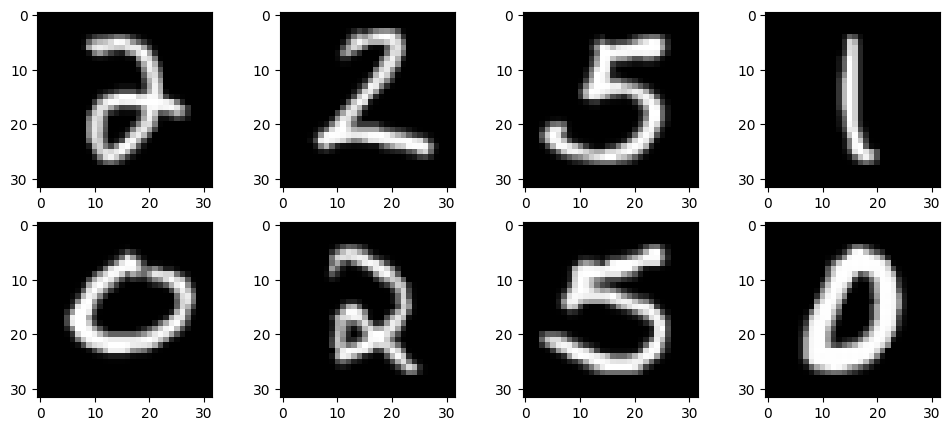

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(8):
    ind = random.randint(0, len(X_train))
    plt.subplot(240 + 1 + i)
    plt.imshow(X_train[ind], cmap='gray')

#Processing data

In [ ]:
from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0

  # One-hot encoding label
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  return X_train, y_train, X_test, y_test


#Build Model

In [ ]:
def LeNet():
  model = Sequential()

  # Convolutional layer
  model.add(Conv2D(filters = 6, kernel_size = (5,5), strides=(1 ,1), padding = 'valid',
                   activation = 'relu', input_shape = (32,32,1)))

  # Max-pooing layer with pooling window size is 2x2
  model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = 'valid'))

  # Convolutional layer
  model.add(Conv2D(filters = 16, kernel_size = (5,5),strides=(1,1), padding = 'valid', activation = 'relu'))

  # Max-pooling layer
  model.add(MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = 'valid'))

  # Flatten layer
  model.add(Flatten())

  # The first fully connected layer
  model.add(Dense(120, activation = 'relu'))

  # The second fully connected layer
  model.add(Dense(84, activation = 'relu'))

  # The output layer
  model.add(Dense(10, activation = 'softmax'))

  # compile the model with a loss function, a metric and an optimizer function
  # In this case, the loss function is categorical crossentropy,
  # we use Adam method with learning rate lr = 0.001 to optimize the loss function
  # metric: accuracy
  initial_learning_rate = 0.001
  decay_rate = 0.001
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=decay_rate,
    staircase=True
  )
  opt = Adam(lr =lr_schedule)
  model.compile(loss = categorical_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'])

  return model

#Build and summary model

In [ ]:
LeNet_model = LeNet()
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

#Visualize filter

In [ ]:
for layer in LeNet_model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d_14 (5, 5, 1, 6)
conv2d_15 (5, 5, 6, 16)


In [ ]:
conv1_layer = LeNet_model.get_layer('conv2d')  # Replace 'conv2d_1' with the name of your first convolutional layer
filters1 = conv1_layer.get_weights()[0]
print(filters1)

[[[[-0.07208786 -0.00353208 -0.09101057  0.14991654 -0.04225633
     0.08981858]]

  [[-0.17657314 -0.1452181  -0.15138799  0.1018474   0.17266552
     0.13697816]]

  [[-0.08443666  0.15330715  0.15588503 -0.01696654  0.14485647
     0.02897382]]

  [[ 0.1577907  -0.15526445 -0.0927311   0.01123489  0.05618058
     0.08524986]]

  [[-0.13254946 -0.15906781 -0.09789977  0.09527449  0.16029401
     0.07257642]]]


 [[[-0.00401896  0.0881357   0.0804572   0.1406791   0.02271697
    -0.09284309]]

  [[ 0.04214512 -0.03815576 -0.07249688  0.05922696 -0.12493441
     0.03614146]]

  [[ 0.14156003 -0.00027344  0.08843051  0.18210404 -0.10470549
    -0.07179155]]

  [[ 0.00259732  0.10224481  0.16772054  0.09535848  0.1393332
    -0.1593895 ]]

  [[-0.11522707 -0.09636731  0.10998453 -0.10289976 -0.01926993
    -0.09552734]]]


 [[[-0.03328243  0.01089312 -0.02174866  0.12957929  0.0263617
     0.1819401 ]]

  [[ 0.11185591 -0.17054507 -0.18249607 -0.10989632 -0.0091574
    -0.0773839 ]]

  [

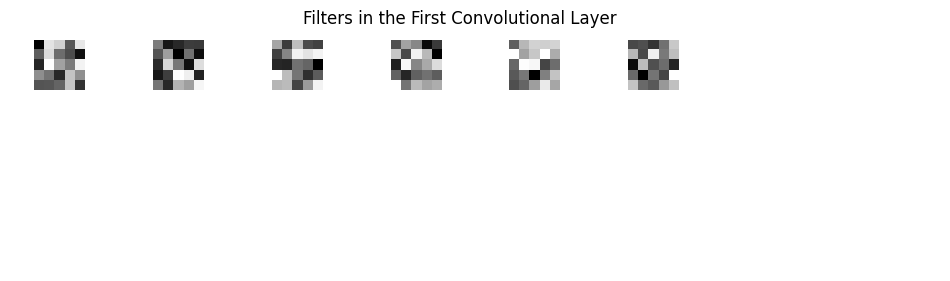

In [ ]:
conv1_layer = LeNet_model.get_layer('conv2d')  # Replace 'conv2d_1' with the name of your first convolutional layer
filters1 = conv1_layer.get_weights()[0]

# Visualize filters in the first layer
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 3))

num_filters1 = filters1.shape[3]  # Get the number of filters in the first layer

for i in range(4):
    for j in range(8):
        filter_index = i * 8 + j
        if filter_index < num_filters1:  # Check if the filter index is within bounds
            axs[i, j].imshow(filters1[:, :, 0, filter_index], cmap='gray')
        axs[i, j].axis('off')

plt.suptitle('Filters in the First Convolutional Layer')
plt.show()


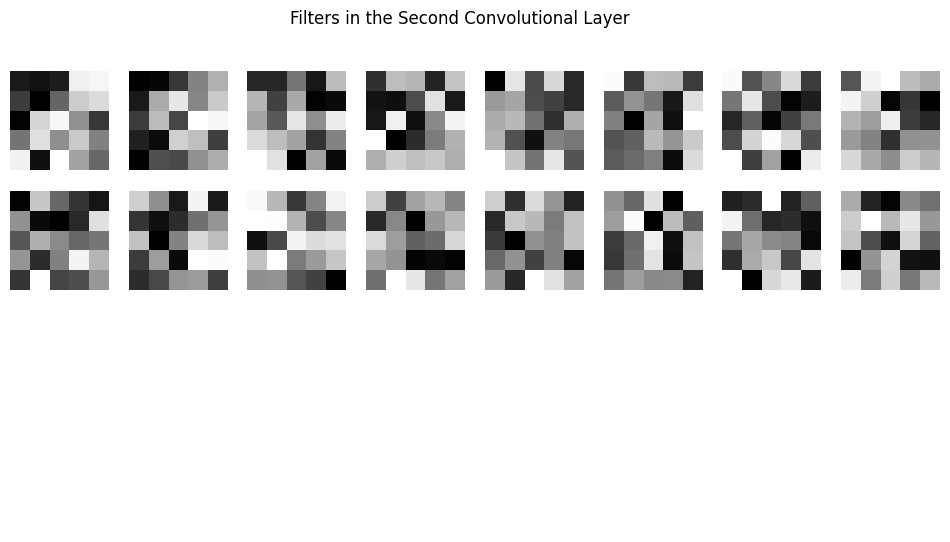

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
conv2_layer = LeNet_model.get_layer('conv2d_1')  # Replace 'conv2d_2' with the name of your second convolutional layer
filters2 = conv2_layer.get_weights()[0]
num_filters2 = filters2.shape[3]  # Get the number of filters in the second layer

for i in range(4):
    for j in range(8):
        filter_index = i * 8 + j
        if filter_index < num_filters2:  # Check if the filter index is within bounds
            axs[i, j].imshow(filters2[:, :, 0, filter_index], cmap='gray')
        axs[i, j].axis('off')

plt.suptitle('Filters in the Second Convolutional Layer')
plt.show()

#Visualize feature map after 2 covolutional layer

1/1 [==============================] - 0s 266ms/step


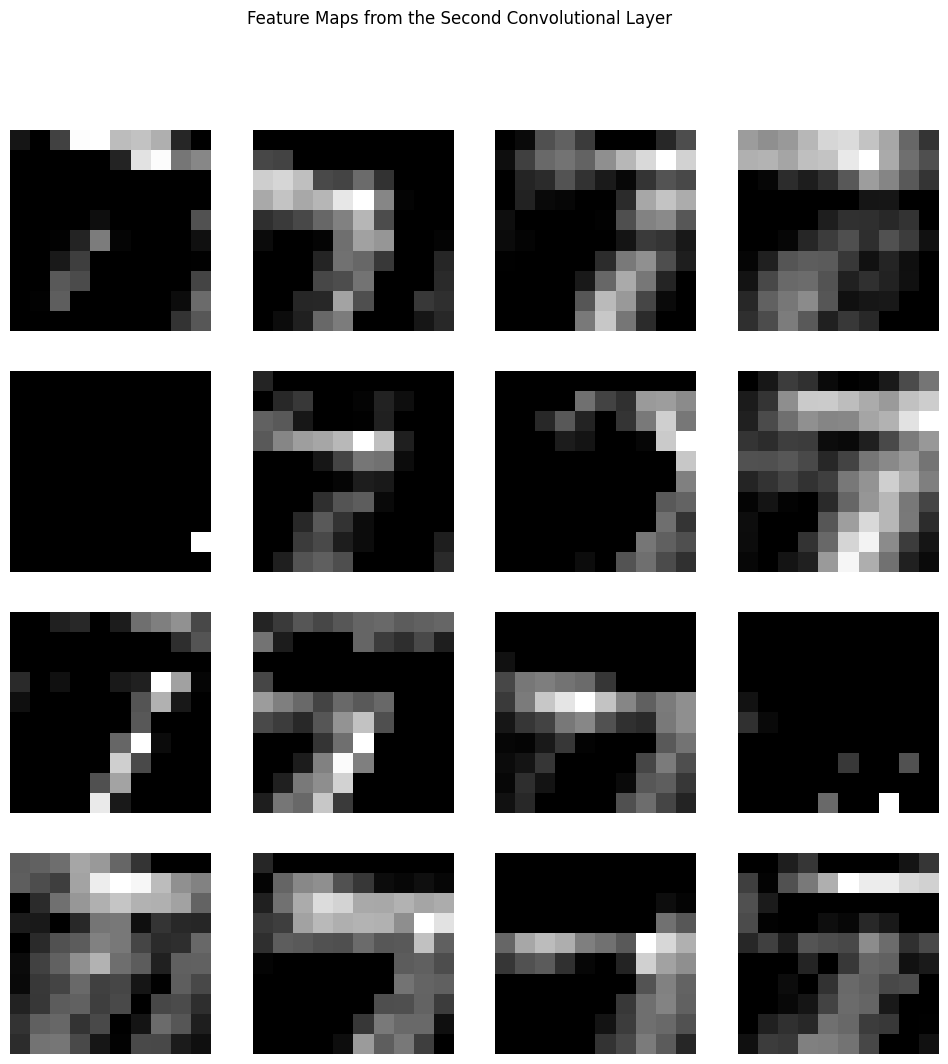

In [ ]:
feature_map_model = tf.keras.Model(inputs=LeNet_model.input, outputs=conv2_layer.output)

# Load an example image from the MNIST dataset
# Replace 'X_test' with your actual test data
example_image = X_test[0]  # Assuming X_test is your test dataset

# Reshape the image to match the model's input shape
example_image = np.expand_dims(example_image, axis=0)
# Get the feature maps
feature_maps = feature_map_model.predict(example_image)

# Visualize the feature maps
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(feature_maps[0, :, :, i * 4 + j], cmap='gray')
        axs[i, j].axis('off')

plt.suptitle('Feature Maps from the Second Convolutional Layer')
plt.show()

(1, 32, 32)
1/1 [==============================] - 0s 94ms/step


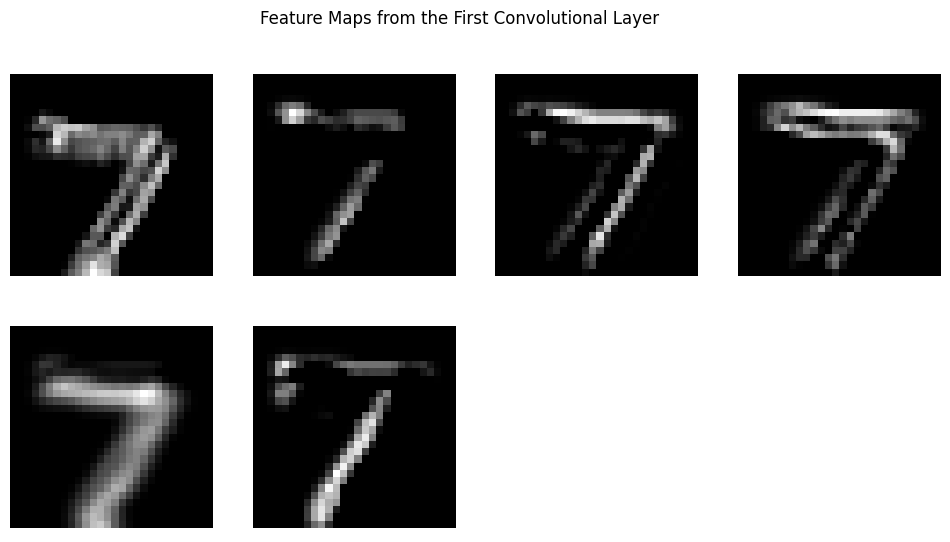

In [ ]:
feature_map_model = tf.keras.Model(inputs=LeNet_model.input, outputs=conv1_layer.output)

# Load an example image from the MNIST dataset
# Replace 'X_test' with your actual test data
example_image = X_test[0]  # Assuming X_test is your test dataset

# Reshape the image to match the model's input shape
example_image = np.expand_dims(example_image, axis=0)
# Get the feature maps
print(example_image.shape)
feature_maps = feature_map_model.predict(example_image)

# Visualize the feature maps
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i in range(2):
    for j in range(4):
        filters_index = i * 4+ j
        if filters_index < num_filters1:
          axs[i, j].imshow(feature_maps[0, :, :, filters_index], cmap='gray')
        axs[i, j].axis('off')

plt.suptitle('Feature Maps from the First Convolutional Layer')
plt.show()

#Train model

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs = 100, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  #Create validation set and ramdom data
  num_validation_sample = int(0.2*len(X_train))
  indx = list(range(0,len(X_train)))
  random.shuffle(indx)
  random.shuffle(indx)
  X_val = X_train[indx[0:num_validation_sample]]
  Y_val = y_train[indx[0:num_validation_sample]]
  #Split into 2 set
  X_train = X_train[indx[num_validation_sample:len(X_train)]]
  y_train = y_train[indx[num_validation_sample:len(y_train)]]
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                      steps_per_epoch = X_train.shape[0]//batch_size,
                      validation_data = (X_val, Y_val),
                      validation_steps = X_val.shape[0]//batch_size,
                      verbose = 1,
                      shuffle = True)
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  return history

In [ ]:
import time
current_time = time.time()
history = train_model(LeNet_model, X_train, y_train, X_test, y_test)
print("Time training:", time.time()-current_time)

Epoch 1/100
375/375 [==============================] - 28s 73ms/step - loss: 0.3271 - accuracy: 0.9041 - val_loss: 0.1196 - val_accuracy: 0.9617
Epoch 2/100
375/375 [==============================] - 23s 62ms/step - loss: 0.0936 - accuracy: 0.9708 - val_loss: 0.0781 - val_accuracy: 0.9742
Epoch 3/100
375/375 [==============================] - 22s 59ms/step - loss: 0.0680 - accuracy: 0.9791 - val_loss: 0.0607 - val_accuracy: 0.9798
Epoch 4/100
375/375 [==============================] - 22s 60ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0536 - val_accuracy: 0.9835
Epoch 5/100
375/375 [==============================] - 22s 60ms/step - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0548 - val_accuracy: 0.9817
Epoch 6/100
375/375 [==============================] - 22s 58ms/step - loss: 0.0385 - accuracy: 0.9877 - val_loss: 0.0498 - val_accuracy: 0.9837
Epoch 7/100
375/375 [==============================] - 23s 63ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0420 - val_ac

#Plot loss & accuracy of model


In [ ]:
def summary_history(history):
  #plot accuracy of model
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()


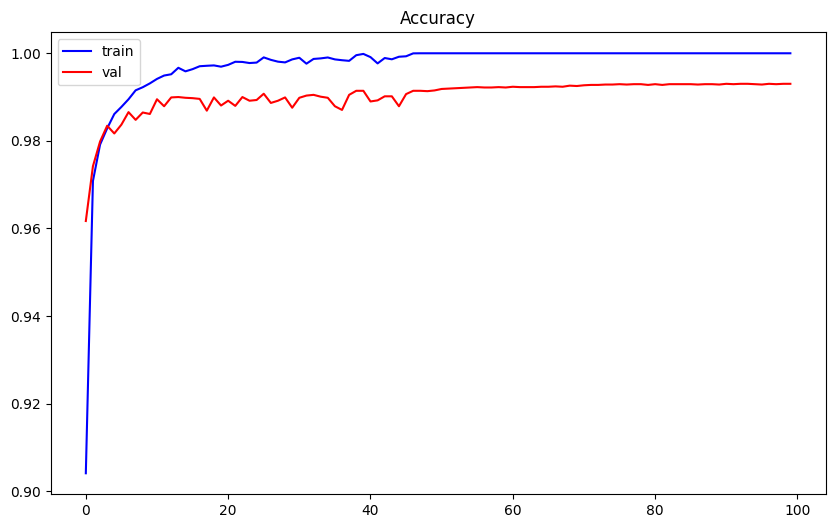

In [ ]:
summary_history(history)

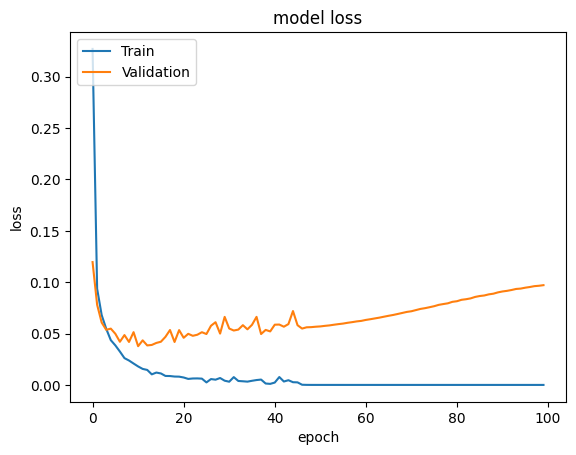

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Save Model

In [ ]:
LeNet_model.save('/content/gdrive/My Drive/Model_CNN/Lenet/my_lenet_model_100epoch.h5')

#Load model

In [ ]:
from keras.models import load_model

# Load the model from Google Drive
my_model = load_model('/content/gdrive/My Drive/Model_CNN/Lenet/my_lenet_model_100epoch.h5')

#Get weight of model

In [ ]:
weights = my_model.get_weights()

# Print the weights
for i, layer_weights in enumerate(weights):
    print(f"Layer {i} weights shape: {layer_weights.shape}")
    print(layer_weights)

Layer 0 weights shape: (5, 5, 1, 6)
[[[[-0.02768894 -0.06886569  0.19775143 -0.16838455 -0.01686518
     0.16403028]]

  [[-0.1205572  -0.2835913   0.29435912 -0.27359444 -0.2718586
     0.12518279]]

  [[ 0.2629243  -0.06237075 -0.02697649 -0.30674195 -0.20470108
     0.06992964]]

  [[ 0.0419069   0.01070796  0.25350997 -0.32210973 -0.04974471
    -0.3231452 ]]

  [[ 0.03440952  0.17949012  0.08972897 -0.14254469  0.10628954
    -0.40475845]]]


 [[[ 0.11280486 -0.7433194  -0.08061965 -0.01893569 -0.1179368
    -0.04741333]]

  [[ 0.33574864 -0.07022159  0.29716828 -0.45168638  0.09732052
     0.23448233]]

  [[ 0.23789479  0.06579801  0.1339194  -0.36336625  0.24930301
     0.23898599]]

  [[-0.03277276 -0.03157365  0.22876719  0.10025389  0.2659451
    -0.0599828 ]]

  [[-0.10483508  0.27413848  0.13939825  0.02053388  0.17358765
    -0.45297933]]]


 [[[ 0.1886474  -0.392968   -0.32621256  0.41710976 -0.00912894
    -0.24782518]]

  [[ 0.11715536  0.16260971  0.07360131  0.0429330

#Predict value

In [ ]:
y_test_pred = []
for i in range(len(X_test)):
  img = X_test[i]
  img = img.reshape(1,32,32,1)
  img = img.astype('float32')
  img = img/255.0
  # one-hot vector output
  vec_p = my_model.predict(img)
  # determine the label corresponding to vector vec_p
  y_p = np.argmax(vec_p)
  y_test_pred.append(y_p)

# convert y_test_pred from list to array
y_test_pred = np.asarray(y_test_pred)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
1/1 [==============================] - 0s 26ms/step


In [ ]:
y_test_pred.shape

(10000,)

#Evaluate model

Text(70.72222222222221, 0.5, 'True classes')

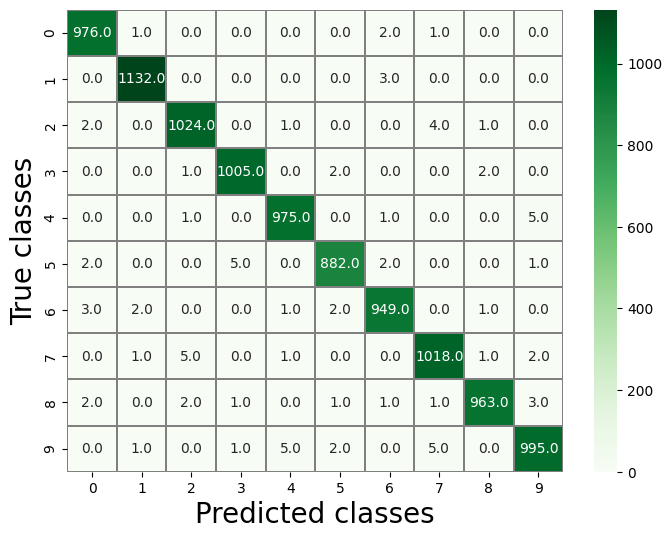

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

con_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize = (8,6))
sns.heatmap(con_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray',
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

In [ ]:
precision = precision_score(y_test, y_test_pred,average ='micro')
recall = recall_score(y_test, y_test_pred, average ='micro')
f1 = f1_score(y_test, y_test_pred, average='micro')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Precision:  0.9919
Recall:  0.9919
F1 score:  0.9919


#Test model

1/1 [==============================] - 0s 23ms/step


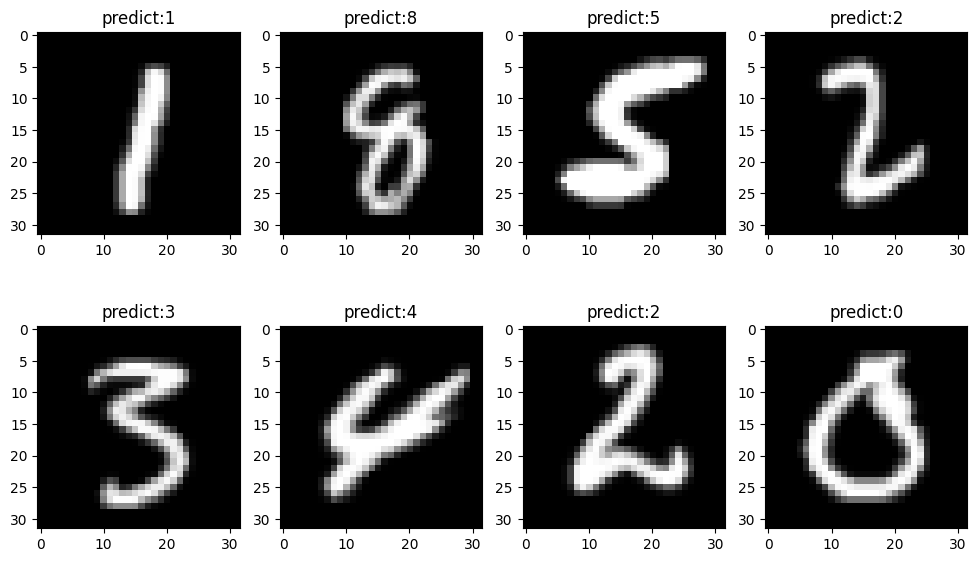

In [ ]:
cates = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize = (12,7))
for i in np.arange(8):
  ind = random.randint(0,len(X_test))
  img = X_test[ind]
  img = img.reshape(1,32,32,1)
  img = img.astype('float32')
  img = img/255.0
  v_p =  np.argmax(my_model.predict(img),axis=1)
  plt.subplot(240+1+i)
  plt.imshow(X_test[ind],cmap='gray')
  plt.title("predict:"+ cates[v_p[0]])